In [4]:
#importar librerias
import pandas as pd
#instanciamos el data.xlsx
df = pd.read_excel('Datos_VRP.xlsx',index_col='i')

In [5]:
df.head()

,x,y,di,ei,li
i,,,,,
1,25,85,20,673,793
2,22,75,30,152,272
3,22,85,10,471,591
4,20,80,40,644,764
5,20,85,20,73,193


In [15]:
X = df.values

In [8]:
from sklearn.cluster import KMeans

In [9]:
modelo = KMeans()
Y = modelo.fit_predict(X)

In [10]:
Y.shape

(100,)

In [11]:
Y

array([3, 6, 7, 3, 0, 4, 2, 4, 4, 7, 6, 2, 3, 0, 6, 2, 3, 4, 2, 1, 2, 4,
       6, 3, 5, 7, 6, 6, 6, 2, 6, 1, 0, 7, 3, 0, 1, 2, 0, 4, 4, 0, 1, 2,
       0, 7, 0, 3, 7, 7, 4, 6, 4, 1, 1, 1, 4, 5, 0, 3, 2, 6, 0, 6, 0, 1,
       2, 1, 6, 5, 2, 0, 2, 3, 2, 2, 5, 4, 4, 5, 4, 6, 0, 4, 4, 4, 4, 2,
       3, 4, 3, 0, 5, 4, 0, 1, 1, 6, 4, 5])

In [12]:
import matplotlib.pyplot as plt

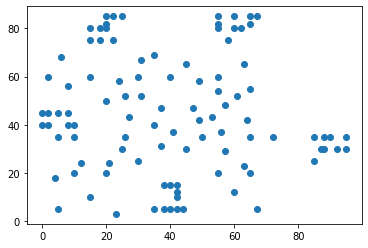

In [13]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [14]:
X1 = df[['x','y']]
X1.head()

,x,y
i,,
1,25,85
2,22,75
3,22,85
4,20,80
5,20,85


# Matriz de Enlaces

In [17]:
#importar la libreria 
from scipy.cluster.hierarchy import linkage

In [22]:
from scipy.spatial.distance import pdist, squareform
#vector de distancias euclidianos
distVect = pdist(df,metric='euclidean')

#los siguientes pasos solo sirven para entender los resultados del vector de distancias
#convertir en matriz cuadrada 
distMat = squareform(distVect)

#convertir en dataframe de Pandas la matriz de distancias
#dist_renglon = pd.DataFrame(distMat,columns=etiquetas, index=etiquetas)
#mostrar
print(distVect,"\n \n")
print(distMat,"\n")
#print(dist_renglon)

[736.94708087 285.86185475  46.17358552 ... 193.17608548 902.42672833
 710.77492921] 
 

[[  0.         736.94708087 285.86185475 ... 709.37507709 518.62896178
  195.41494313]
 [736.94708087   0.         451.68794538 ...  42.26109322 224.7509733
  931.02201907]
 [285.86185475 451.68794538   0.         ... 424.15563181 235.9639803
  479.89165444]
 ...
 [709.37507709  42.26109322 424.15563181 ...   0.         193.17608548
  902.42672833]
 [518.62896178 224.7509733  235.9639803  ... 193.17608548   0.
  710.77492921]
 [195.41494313 931.02201907 479.89165444 ... 902.42672833 710.77492921
    0.        ]] 



In [23]:
#clustering
clusters = linkage(distVect,method='complete')
#complete -> algoritmo del punto mas lejano o algoritmo Voor Hees
#single -> algoritmo del punto mas lejano
#centroid -> algoritmo entre los centroides

In [28]:
#numero de pasos
num_pasos= clusters.shape[0]
print(num_pasos)
# ver los resultados del agrupamiento en un dataframe de mpandas
pd.DataFrame(clusters,columns=['Etiqueta 1','Etiqueta 2','Similitud','No. en cluster'],
            index=['Paso %d' %(i+1) for i in range(num_pasos)])

99


,Etiqueta 1,Etiqueta 2,Similitud,No. en cluster
Paso 1,26.0,27.0,12.328828,2.0
Paso 2,55.0,65.0,16.000000,2.0
Paso 3,38.0,71.0,16.431677,2.0
Paso 4,80.0,89.0,17.691806,2.0
Paso 5,64.0,91.0,18.841444,2.0
...,...,...,...,...
Paso 95,188.0,191.0,316.109158,22.0
Paso 96,185.0,192.0,356.698752,33.0
Paso 97,190.0,193.0,420.148783,45.0
Paso 98,194.0,195.0,702.040597,55.0


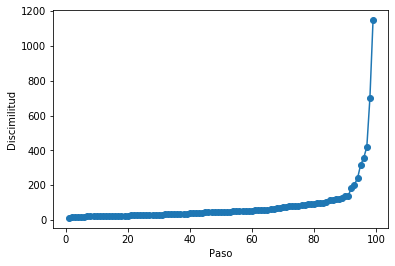

In [25]:
#seleccionar el numero de clusters
pasos=[i+1 for i in range(num_pasos)]
plt.plot(pasos, clusters[:,2], marker='o')
plt.xlabel('Paso')
plt.ylabel('Discimilitud')
plt.show()